# OSMnx features demo

Get street networks anywhere in the world from OpenStreetMap data then analyze and visualize them.

More info:

  - [Documentation and install instructions](https://osmnx.readthedocs.io)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Journal article and citation info](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [2]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.12'

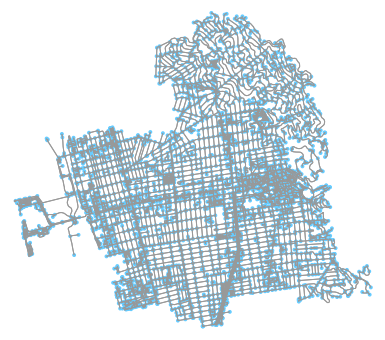

In [5]:
# get the walking network for piedmont
G = ox.graph_from_place('Berkeley, California, USA', network_type='walk')
fig, ax = ox.plot_graph(G)

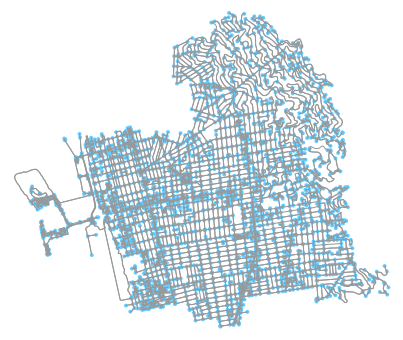

In [6]:
# get the walking network for piedmont
G = ox.graph_from_place('Berkeley, California, USA', network_type='bike')
fig, ax = ox.plot_graph(G)

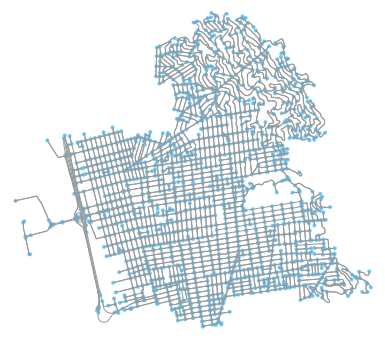

In [7]:
# get the walking network for piedmont
G = ox.graph_from_place('Berkeley, California, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

In [3]:
import geopandas as gpd
import fiona

In [4]:
print(gpd.__version__)
print(fiona.__version__)

0.7.0
1.8.13


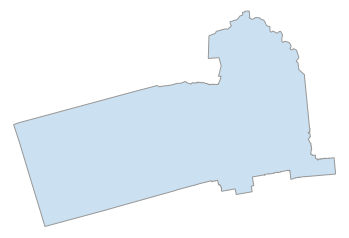

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13f5c1f50>)

In [8]:
import osmnx as ox
city = ox.gdf_from_place('Berkeley, California')
ox.plot_shape(ox.project_gdf(city))

In [9]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

32789550.934492193

In [10]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 2101,
 'm': 5746,
 'k_avg': 5.469776297001428,
 'intersection_count': 1931,
 'streets_per_node_avg': 3.187529747739172,
 'streets_per_node_counts': {0: 0, 1: 170, 2: 43, 3: 1128, 4: 743, 5: 17},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.0809138505473584,
  2: 0.020466444550214184,
  3: 0.5368871965730605,
  4: 0.35364112327463115,
  5: 0.00809138505473584},
 'edge_length_total': 694556.1130000026,
 'edge_length_avg': 120.87645544726811,
 'street_length_total': 383417.49000000086,
 'street_length_avg': 116.36342640364214,
 'street_segments_count': 3295,
 'node_density_km': 64.07529045449363,
 'intersection_density_km': 58.89071197888015,
 'edge_density_km': 21182.23925626809,
 'street_density_km': 11693.282740163237,
 'circuity_avg': 1.047365246255934,
 'self_loop_proportion': 0.000870170553428472,
 'clean_intersection_count': 1450,
 'clean_intersection_density_km': 44.22140464493849}

stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats

In [11]:
# see more stats (mostly topological stuff) with extended_stats
more_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True) #use arguments to turn other toplogical analyses on/off
for key in sorted(more_stats.keys()):
    print(key)

avg_neighbor_degree
avg_neighbor_degree_avg
avg_weighted_neighbor_degree
avg_weighted_neighbor_degree_avg
betweenness_centrality
betweenness_centrality_avg
center
closeness_centrality
closeness_centrality_avg
clustering_coefficient
clustering_coefficient_avg
clustering_coefficient_weighted
clustering_coefficient_weighted_avg
degree_centrality
degree_centrality_avg
diameter
eccentricity
pagerank
pagerank_max
pagerank_max_node
pagerank_min
pagerank_min_node
periphery
radius


In [10]:
# pull up some stat's value
more_stats['radius']

2507.4629999999997

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='mynetwork_shapefile')
ox.save_graphml(G, filename='mynetwork.graphml')

In [22]:
G.edges()

OutMultiEdgeDataView([(2820169731, 53108131), (2820169731, 2820169759), (2820169731, 2820169753), (2820169731, 2820169751), (2820169732, 2820169754), (2820169732, 2820169735), (2820169732, 53090188), (53108742, 53108745), (2820169735, 2820169740), (2820169735, 2820169732), (53108745, 53108742), (53108745, 53098232), (53108745, 53093979), (53108745, 53131108), (2820169738, 2820169758), (2820169738, 2820169753), (2820169740, 165562097), (2820169740, 2820169735), (2820169740, 2820169756), (53108749, 243673087), (53108749, 53125563), (53108749, 53030298), (53116941, 240448850), (53116941, 240448833), (53116941, 240448836), (53116948, 240448874), (53116948, 240448936), (53116948, 53029731), (2820169750, 2820169759), (2820169750, 2820169751), (2820169750, 53066460), (2820169750, 2820169754), (2820169751, 53066465), (2820169751, 2820169750), (2820169751, 2820169731), (2820169751, 2820169756), (2820169753, 2820169738), (2820169753, 53082577), (2820169753, 2820169731), (2820169753, 53117302), (

## Visualize street centrality

In [14]:
# edge closeness centrality: convert graph to line graph so edges become nodes and vice versa
# use nx <> 2.1 to avoid a networkx bug
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

In [15]:
edge_centrality

{(2820169731, 53108131, 0): 0.03574048061554836,
 (53108131, 53066465, 0): 0.03475858735726488,
 (53108131, 2820169758, 0): 0.03475858735726488,
 (53108131, 2820169731, 0): 0.03475858735726488,
 (2820169731, 2820169759, 0): 0.03574048061554836,
 (2820169759, 2820169750, 0): 0.03539926794190446,
 (2820169759, 2820169731, 0): 0.03539926794190446,
 (2820169759, 53090187, 0): 0.03539926794190446,
 (2820169731, 2820169753, 0): 0.03574048061554836,
 (2820169753, 2820169738, 0): 0.03674570385581853,
 (2820169753, 53082577, 0): 0.03674570385581853,
 (2820169753, 2820169731, 0): 0.03674570385581853,
 (2820169753, 53117302, 0): 0.03674570385581853,
 (2820169731, 2820169751, 0): 0.03574048061554836,
 (2820169751, 53066465, 0): 0.034743821423007824,
 (2820169751, 2820169750, 0): 0.034743821423007824,
 (2820169751, 2820169731, 0): 0.034743821423007824,
 (2820169751, 2820169756, 0): 0.034743821423007824,
 (2820169732, 2820169754, 0): 0.03316562722782766,
 (2820169754, 2820169756, 0): 0.0335760423581

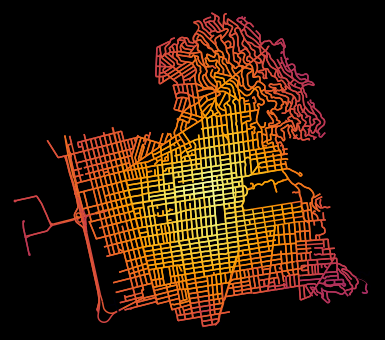

In [16]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

In [17]:
ev

[0.03574048061554836,
 0.03574048061554836,
 0.03574048061554836,
 0.03574048061554836,
 0.03316562722782766,
 0.03316562722782766,
 0.03316562722782766,
 0.032110343741953554,
 0.03251834600801103,
 0.03251834600801103,
 0.033177351420626014,
 0.033177351420626014,
 0.033177351420626014,
 0.033177351420626014,
 0.035622172208197016,
 0.035622172208197016,
 0.032789332224744464,
 0.032789332224744464,
 0.032789332224744464,
 0.03578001703961341,
 0.035780687902354225,
 0.03578001703961341,
 0.030082588442227852,
 0.030082904588563712,
 0.030082430371551738,
 0.038771619981311005,
 0.038771619981311005,
 0.03877214513565389,
 0.03445152974220334,
 0.03445152974220334,
 0.03445152974220334,
 0.03445152974220334,
 0.034743821423007824,
 0.034743821423007824,
 0.034743821423007824,
 0.034743821423007824,
 0.03674570385581853,
 0.03674570385581853,
 0.03674570385581853,
 0.03674570385581853,
 0.03357604235811824,
 0.03357604235811824,
 0.03357604235811824,
 0.04603880441360318,
 0.046039544

## Routing

### shortest paths by length

In [30]:
# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (37.828903, -122.245846))
dest_node = ox.get_nearest_node(G, (37.812303, -122.215006))

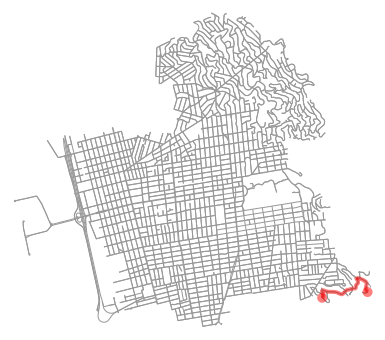

In [31]:
# find the shortest path between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [38]:
# how long is our route in meters? 
nx.shortest_path_length(G, orig_node, dest_node, weight='length')

1604.7379999999998

In [18]:
G.nodes()

NodeView((53090322, 53090323, 53068822, 53068826, 53142555, 53068829, 53021742, 53021743, 53144625, 317363251, 53021750, 53065783, 53089336, 53065785, 53119042, 53127240, 703006798, 683050066, 53113943, 53113946, 53113947, 686202982, 53097585, 53097586, 683790465, 683050115, 53080198, 683050120, 260707479, 53152921, 260707482, 53057697, 53057704, 53117097, 53117098, 256542898, 256340150, 683790519, 53119160, 53119162, 53119164, 53119166, 53085375, 53119168, 53085377, 2890584258, 53085380, 53085382, 53085385, 53137611, 53085387, 53085388, 53085389, 53126347, 53126350, 687156433, 3581678802, 53102808, 683050204, 3581678815, 53114734, 53117160, 683050219, 683050221, 53117166, 53037306, 53037307, 370467066, 53108990, 53108992, 4606504193, 53100813, 53091598, 245505298, 53076244, 53076245, 53076246, 53076247, 53041432, 245118228, 53076250, 53157145, 53041437, 53041440, 53025057, 53041442, 53041443, 53025060, 53041445, 245387557, 53155115, 53156140, 53059885, 53156142, 53062956, 53062958, 53

### or by travel time

In [39]:
# assign speeds and traversal times to the edges
for u, v, k, d in G.edges(keys=True, data=True):
    if 'residential' in d['highway']:
        d['speed'] = 20
    elif 'tertiary' in d['highway']:
        d['speed'] = 30
    elif 'secondary' in d['highway']:
        d['speed'] = 40
    else:
        d['speed'] = 25
    
    # calculate time to traverse edge, in minutes
    d['time'] = d['length'] / (d['speed'] * 1609.34 / 60) #miles/hour to meters/minute

In [40]:
# find the shortest path between these nodes by time then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='time')


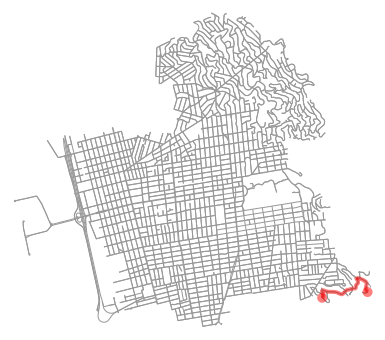

In [41]:
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [42]:
# how long is our route in minutes?
nx.shortest_path_length(G, orig_node, dest_node, weight='time')

2.596364099568768

## Get networks other ways

make queries less ambiguous to help the geocoder out if it's not finding what you're looking for

In [3]:
# OSM not always geocode a query to what you might expect...
place = 'San Francisco, California, USA'
G = ox.graph_from_place(place, network_type='walk')

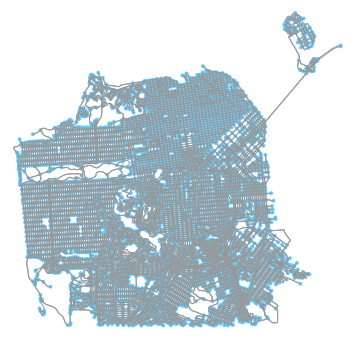

In [47]:
fig, ax = ox.plot_graph(G)

In [4]:
# let's see what it matches that query string to...
url = 'https://nominatim.openstreetmap.org/search?format=json&limit=1&dedupe=0&polygon_geojson=1&q={}'
url = url.format(place)
response = requests.get(url)
response.json()

[{'place_id': 234623529,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 111968,
  'boundingbox': ['37.6403143', '37.929811', '-123.173825', '-122.281479'],
  'lat': '37.7790262',
  'lon': '-122.4199061',
  'display_name': 'San Francisco, San Francisco City and County, California, United States of America',
  'class': 'boundary',
  'type': 'administrative',
  'importance': 1.0351309463713039,
  'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png',
  'geojson': {'type': 'MultiPolygon',
   'coordinates': [[[[-123.173825, 37.775727],
      [-123.173763, 37.771831],
      [-123.172926, 37.7636],
      [-123.169985, 37.75593],
      [-123.166699, 37.74993],
      [-123.162751, 37.743533],
      [-123.156757, 37.73784],
      [-123.149127, 37.732279],
      [-123.141495, 37.72616],
      [-123.132597, 37.719393],
      [-123.126114, 37.71673],
      [-123.119645, 37.7154

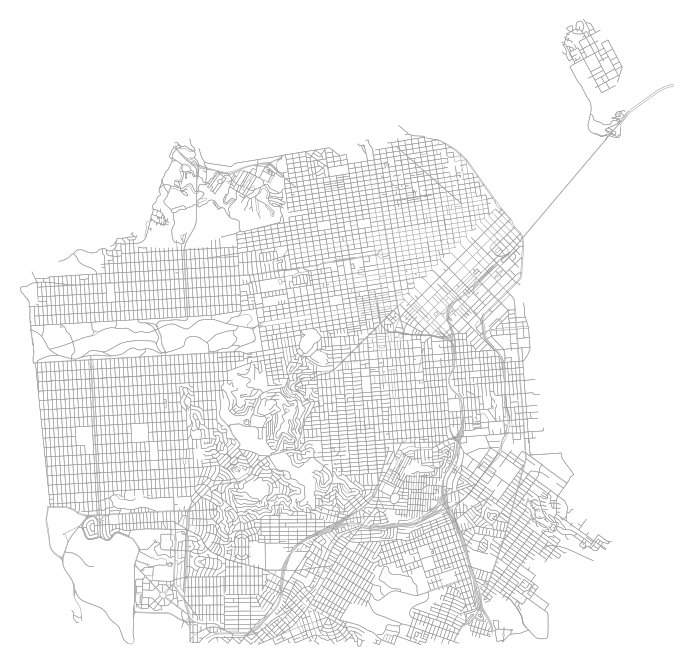

In [7]:
# make query an unambiguous dict to help the geocoder find specifically what you're looking for
place = {'city' : 'San Francisco',
         'state' : 'California',
         'country' : 'USA'}
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)

## Short Tutorial on using the google maps api

In [8]:
import googlemaps
from datetime import datetime
my_gkey='Add__here_your_key'
gmaps = googlemaps.Client(key=my_gkey) #

In [9]:
print(googlemaps.__version__)

2.5.1


In [10]:
# Geocoding an address
geocode_result = gmaps.geocode('1600 Amphitheatre Parkway, Mountain View, CA')

In [11]:
geocode_result

[{'address_components': [{'long_name': '1600',
    'short_name': '1600',
    'types': ['street_number']},
   {'long_name': 'Amphitheatre Parkway',
    'short_name': 'Amphitheatre Pkwy',
    'types': ['route']},
   {'long_name': 'Mountain View',
    'short_name': 'Mountain View',
    'types': ['locality', 'political']},
   {'long_name': 'Santa Clara County',
    'short_name': 'Santa Clara County',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'California',
    'short_name': 'CA',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United States',
    'short_name': 'US',
    'types': ['country', 'political']},
   {'long_name': '94043', 'short_name': '94043', 'types': ['postal_code']}],
  'formatted_address': '1600 Amphitheatre Pkwy, Mountain View, CA 94043, USA',
  'geometry': {'location': {'lat': 37.42165019999999, 'lng': -122.0856843},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.42299918029149,
     'ln

In [12]:
yadd=geocode_result[0]['geometry']['location'] ['lat']

In [13]:
xadd=geocode_result[0]['geometry']['location'] ['lng']

In [14]:
address_coord=(yadd,xadd)

In [15]:
address_coord

(37.42165019999999, -122.0856843)

See a short tutorial here: https://towardsdatascience.com/how-to-generate-lat-and-long-coordinates-from-an-address-column-using-pandas-and-googlemaps-api-d66b2720248d

In [16]:
# Look up an address with reverse geocoding
reverse_geocode_result = gmaps.reverse_geocode((40.714224, -73.961452))

In [17]:
reverse_geocode_result

[{'address_components': [{'long_name': '277',
    'short_name': '277',
    'types': ['street_number']},
   {'long_name': 'Bedford Avenue',
    'short_name': 'Bedford Ave',
    'types': ['route']},
   {'long_name': 'Williamsburg',
    'short_name': 'Williamsburg',
    'types': ['neighborhood', 'political']},
   {'long_name': 'Brooklyn',
    'short_name': 'Brooklyn',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': 'Kings County',
    'short_name': 'Kings County',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'New York',
    'short_name': 'NY',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United States',
    'short_name': 'US',
    'types': ['country', 'political']},
   {'long_name': '11211', 'short_name': '11211', 'types': ['postal_code']}],
  'formatted_address': '277 Bedford Ave, Brooklyn, NY 11211, USA',
  'geometry': {'location': {'lat': 40.7142205, 'lng': -73.9612903},
   'location_ty

In [18]:
# Request directions via public transit
now = datetime.now()

In [19]:
now

datetime.datetime(2020, 11, 3, 2, 52, 6, 176408)

In [20]:
directions_result = gmaps.directions("Sydney Town Hall",
                                     "Parramatta, NSW",
                                     mode="transit",
                                     departure_time=now)

In [ ]:
directions_result

Run:

jupyter nbextension enable --py gmaps from the command line

see a tutorial here:https://medium.com/future-vision/google-maps-in-python-part-2-393f96196eaf

In [21]:
import gmaps
gmaps.configure(api_key=my_gkey)

In [22]:
gmaps.figure(center=address_coord, zoom_level=12)

Figure(layout=FigureLayout(height='420px'))

In [23]:
# add elevation to nodes automatically, calculate edge grades, plot network
#from keys import google_elevation_api_key
googe_elevation_api_key='Add_here_your_key'
G = ox.add_node_elevations(G,api_key=googe_elevation_api_key)
G = ox.add_edge_grades(G)

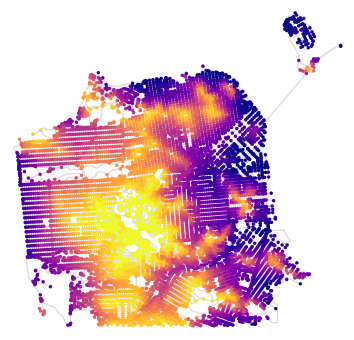

In [24]:
nc =ox.get_node_colors_by_attr(G, 'elevation', cmap='plasma', num_bins=20)
fig, ax = ox.plot_graph(G, fig_height=6, node_color=nc, node_size=12, node_zorder=2, edge_color='#dddddd')

In [108]:
## Back to OSMNx without google map API

example: create impedance functions to route around hills: https://github.com/gboeing/osmnx-examples/blob/master/notebooks/12-node-elevations-edge-grades.ipynb

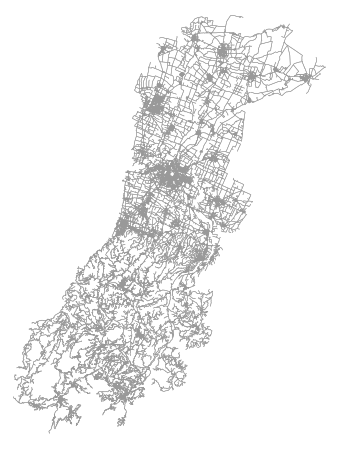

In [112]:
# you can get networks anywhere in the world
G = ox.graph_from_place('Modena, Italy', network_type='drive_service')
fig, ax = ox.plot_graph(G, fig_height=8, node_size=0, edge_linewidth=0.5)

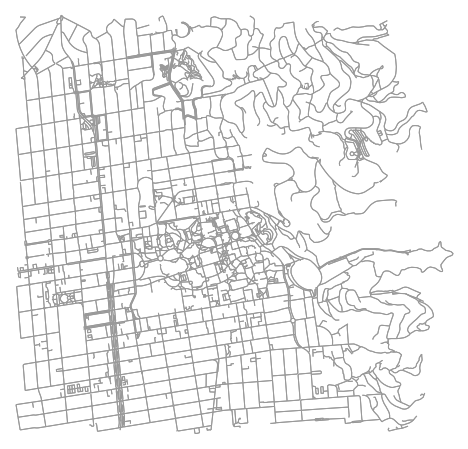

In [111]:
# or get network by coordinates, bounding box, or any custom polygon shape
# useful when OSM just doesn't have a polygon for the place you want
davis_hall = (37.8745656,-122.2580841) 
one_mile = 1609 #meters
G = ox.graph_from_point(davis_hall, distance=one_mile, network_type='walk')
fig, ax = ox.plot_graph(G, fig_height=8, node_size=0)

examples of getting networks by coordinates, bounding box, or any custom polygon shape: https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb

## Get other infrastructure types

like rail or electric grids

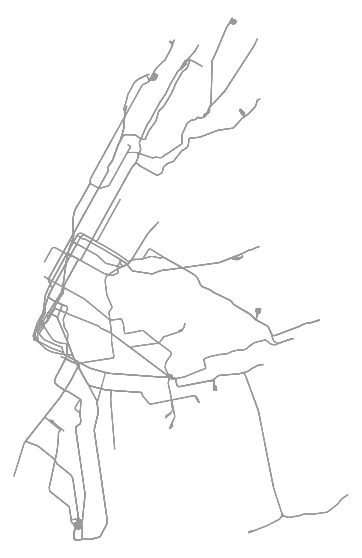

In [113]:
# get rail network
# note this is rail *infrastructure* and thus includes crossovers, sidings, spurs, yards, etc
# for station-based rail network, you should prob download a station adjacency matrix elsewhere
G = ox.graph_from_place('New York City, New York',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        network_type='none', infrastructure='way["railway"~"subway"]')

fig, ax = ox.plot_graph(G, fig_height=10, node_size=0)

## Merge multiple graphs together

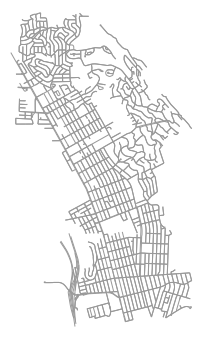

In [115]:
place1 = {'city':'Albany', 'state':'California', 'country':'USA'}
place2 = {'city':'El Cerrito', 'state':'California', 'country':'USA'}
G1 = ox.graph_from_place(place1, network_type='drive', buffer_dist=100)
G2 = ox.graph_from_place(place2, network_type='drive', buffer_dist=100)
G = nx.compose(G1, G2)
fig, ax = ox.plot_graph(G, node_size=0)